**Modules**

In [1]:
from PIL import  Image
import matplotlib.pyplot as plt
import aes
import numpy as np

**Main**

In [2]:
# Generates a random-key
rng = np.random.default_rng(seed= 1234)
key= rng.integers(low= 0, high= 256, size= 16, dtype= np.uint8)
print("Key", key)

Key [186 187 182 250 243 254   8 250 129 172 233 252 247 129  84  97]


In [3]:
# Creates an instance of AES-128
aes = aes.AES(key)

AES: Initialization Complete


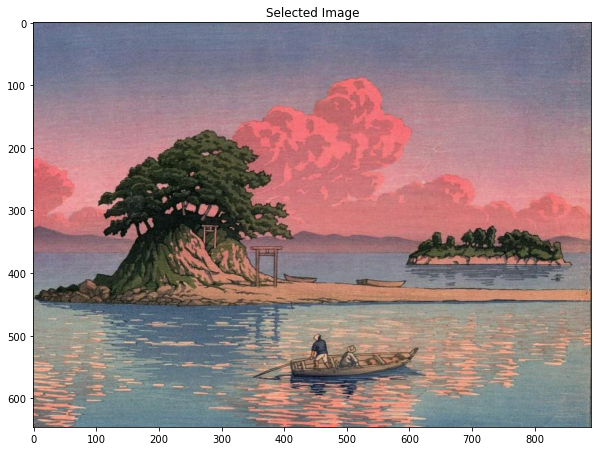

Image size (891, 646)


In [4]:
# Read & Display an image
# Image-Source: https://www.instagram.com/p/C4JB5IboQRW/

img = Image.open("./art.jpg")
fig, axis = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 10))
axis.imshow(img)
axis.set_title("Selected Image")
plt.show()
print(f"Image size", img.size)

In [5]:
# Image-Encryption
cipher, (flag, org_shape) = aes.encrypt_image(img)  

Alert: The input-image's dimensions are not a multiple of 16. Resizing it temporarily.

Encrypting Channel 1


100%|███████████████████████████████████████████████████████████████████████████| 36736/36736 [00:40<00:00, 896.13it/s]


Encrypting Channel 2


100%|███████████████████████████████████████████████████████████████████████████| 36736/36736 [00:45<00:00, 798.92it/s]


Encrypting Channel 3


100%|███████████████████████████████████████████████████████████████████████████| 36736/36736 [00:40<00:00, 905.79it/s]

Encryption complete


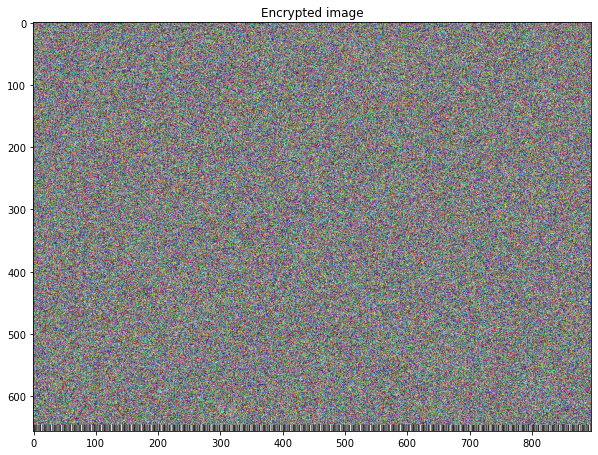

In [6]:
# Displays the encrypted-image
fig, axis = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 10))
axis.imshow(cipher)
axis.set_title("Encrypted image")
plt.show()

In [7]:
# Image-Decryption
decipher = aes.decrypt_img(cipher, flag, org_shape)

Decrypting Channel 1


100%|███████████████████████████████████████████████████████████████████████████| 36736/36736 [00:42<00:00, 871.77it/s]


Decrypting Channel 2


100%|███████████████████████████████████████████████████████████████████████████| 36736/36736 [00:41<00:00, 885.46it/s]


Decrypting Channel 3


100%|███████████████████████████████████████████████████████████████████████████| 36736/36736 [00:44<00:00, 825.47it/s]

Decryption complete


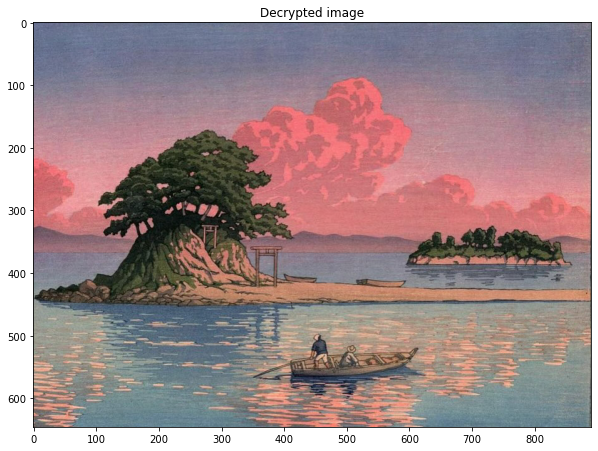

In [8]:
# Displays the decrypted-image
fig, axis = plt.subplots(nrows= 1, ncols= 1, figsize= (10, 10))
axis.imshow(decipher)
axis.set_title("Decrypted image")
plt.show()

In [9]:
# Are the images identical?

img = np.array(img)

diff = np.sum(img - decipher)

if diff == 0:
    print(True)
else:
    print(False)

True
